# House Prices: Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.decomposition import PCA

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

### EDA and Data Cleaning

In [2]:
house_df = pd.read_csv('data/train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
house_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [5]:
house_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
all_nulls = pd.DataFrame(100*pd.isnull(house_df).sum()/pd.isnull(house_df).count())
all_nulls[all_nulls[0]>0]

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,0.547945
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


We can drop `MiscFeature`, `Fence`, `PoolQC`, `FireplaceQu` and `Alley` since over 45% of the data is missing from these columns. 

In [7]:
missing_cols = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley']
house_df = house_df.drop(missing_cols, axis=1)
house_df.columns.values.shape

(76,)

### Exploring the Distribution of Sale Price

Text(0,0.5,'Frequency')

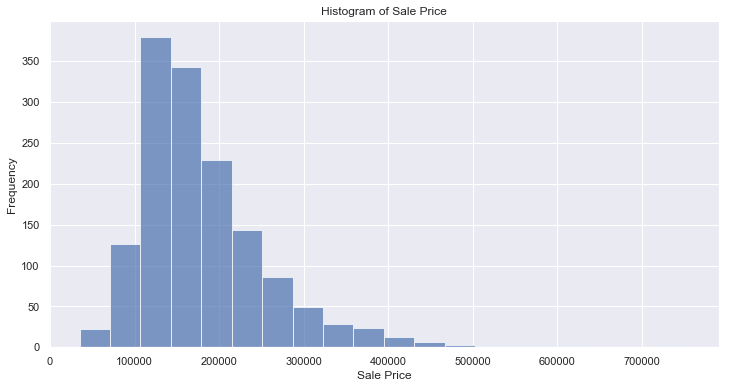

In [8]:
sale_price = house_df['SalePrice']
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(sale_price, bins=20, alpha=0.7)
ax.set_title('Histogram of Sale Price')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Frequency')

We can do a log transform here since the data is right-skewed

Text(0,0.5,'Frequency')

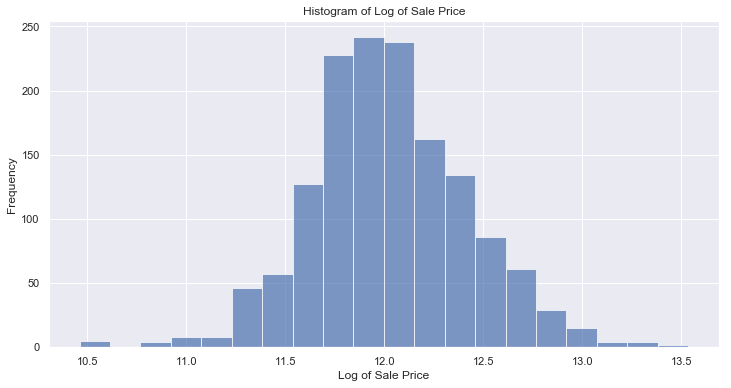

In [9]:
house_df['SalePrice'] = np.log(house_df['SalePrice'])
sale_price = house_df['SalePrice']
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(sale_price, bins=20, alpha=0.7)
ax.set_title('Histogram of Log of Sale Price')
ax.set_xlabel('Log of Sale Price')
ax.set_ylabel('Frequency')

### Creating Training Set and Validation Set

In [10]:
train_set, val_set = train_test_split(house_df, train_size=0.85, test_size=0.15, random_state=42)
# Imputing with the median
train_set = train_set.fillna(train_set.median())
numerics = ['float64', 'int64']
train_set = train_set.select_dtypes(include=numerics)
col = ['SalePrice']
y_train = train_set[col]
x_train = train_set[train_set.columns.difference(col)]

In [11]:
val_set = val_set.fillna(train_set.median())
val_set = val_set.select_dtypes(include=numerics)
col = ['SalePrice']
y_val = val_set[col]
x_val = val_set[val_set.columns.difference(col)]

### Defining Loss Function and Standardization Functions

In [12]:
def rmse(y_true, y_preds):
    return np.sqrt(mean_squared_error(y_true, y_preds))

In [13]:
# IMPORTANT: ONLY USE TRAINING SET INFORMATION TO STANDARDIZE.

def standardize(df, ref_df=None):
    if ref_df is None:
        ref_df = df
        
    std_df = df.copy()
    for col in df.columns.values:
        std_df[col] = (std_df[col]-ref_df[col].mean())/ref_df[col].std()
    return std_df

### Approach 1: Comparing between 3 models on the standardized sets

    1. Linear Regression
    2. Lasso CV
    3. Elastic Net CV

In [14]:
x_train_norm = standardize(x_train)
x_val_norm = standardize(x_val, x_train)
simple_model = LinearRegression().fit(x_train_norm, y_train)
preds_simple = simple_model.predict(x_train_norm)
lambs = [0.001,0.1,0.5,1,5,10,100,1000,10000]
l1s = [0.1, 0.5, 0.99, 0.01, 0.001, 0.999]
lasso_model = LassoCV(alphas=lambs,cv=10,max_iter=10000).fit(x_train_norm, y_train.values.ravel())
en_model = ElasticNetCV(alphas=lambs, l1_ratio=l1s, cv=10, max_iter=10000).fit(x_train_norm, y_train.values.ravel())

### Approach 2: Principal Component Analysis (PCA)

Text(0,0.5,'Variance Explained')

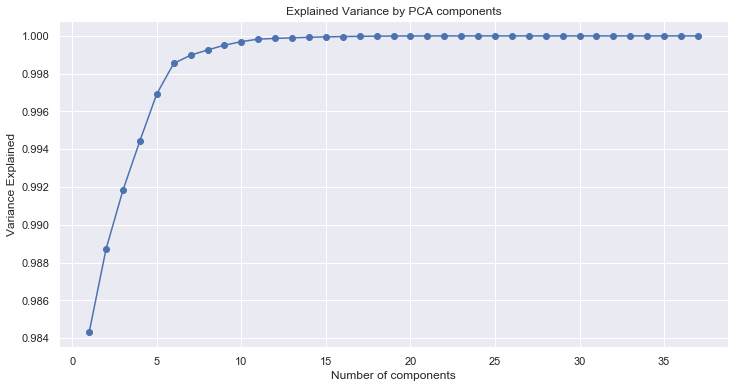

In [15]:
pca = PCA(n_components=len(x_train.columns)).fit(x_train)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1,len(x_train.columns)+1),np.cumsum(pca.explained_variance_ratio_), 'o-')
ax.set_title('Explained Variance by PCA components')
ax.set_xlabel('Number of components')
ax.set_ylabel('Variance Explained')

Looks like 10 components captures the variance adequately

### Evaluation between models from Approaches 1 and 2

In [16]:
pca_chosen = PCA(n_components=10).fit(x_train)
x_train_transformed = pca_chosen.transform(x_train)
pca_model = LinearRegression().fit(x_train_transformed, y_train)
preds_train_pca = pca_model.predict(x_train_transformed)

print(rmse(y_train,preds_simple))
print(rmse(y_train,lasso_model.predict(x_train_norm)))
print(rmse(y_train,preds_train_pca))
print(rmse(y_train,en_model.predict(x_train_norm)))

0.14432248787822916
0.14446865369846348
0.2239592568481202
0.15043853529439802


In [17]:
preds_val = simple_model.predict(x_val_norm)
preds_lasso = lasso_model.predict(x_val_norm)
preds_en = en_model.predict(x_val_norm)
x_val_transformed = pca_chosen.transform(x_val)
preds_val_pca = pca_model.predict(x_val_transformed)

print(rmse(y_val, preds_val))
print(rmse(y_val, preds_lasso))
print(rmse(y_val, preds_val_pca))
print(rmse(y_val, preds_en))

0.1510472314729402
0.1506719766350288
0.2202294105724969
0.1580247413313754


**Conclusion**: Lasso has the lowest validation set score, this is the chosen model thus far

### Approach 3: Looking at a few variables correlated with `SalePrice`

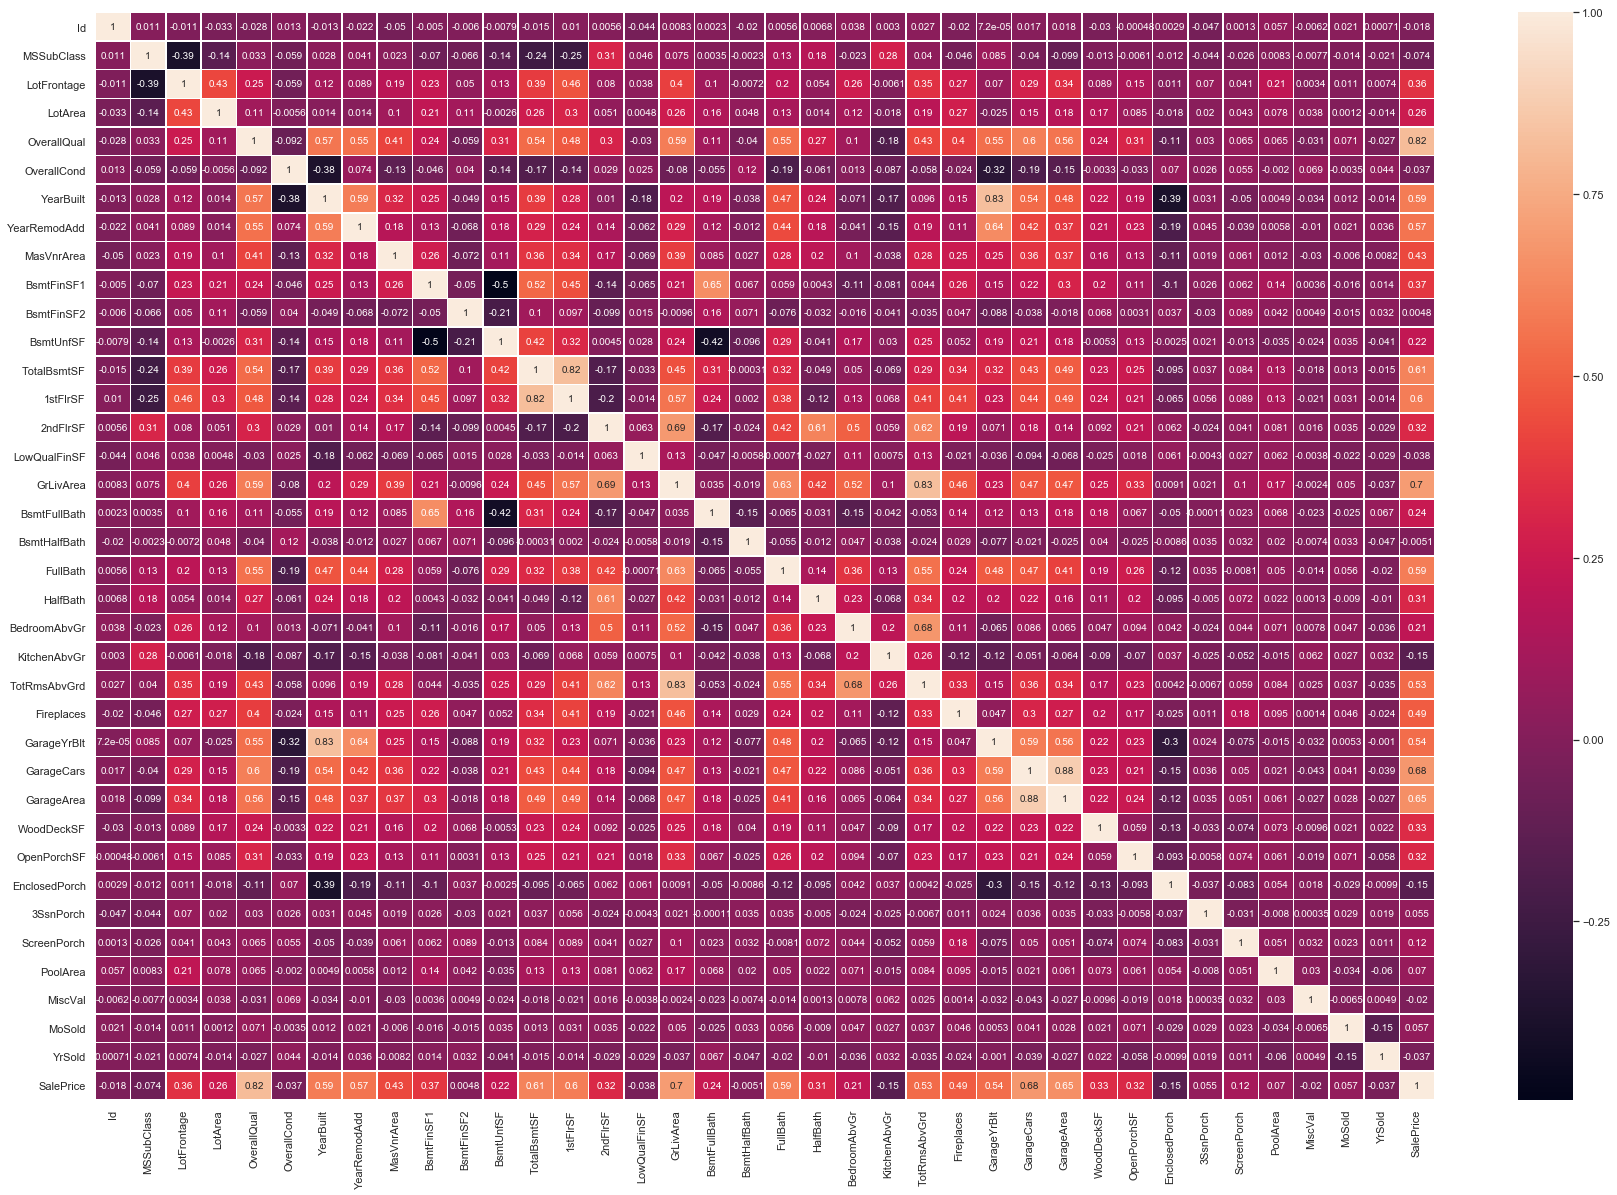

In [18]:
corr = house_df.corr()
fig, ax = plt.subplots(figsize=(30,20))         
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

From the image above, it seems like the columns `OverallQual`, `YearBuilt`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `FullBath`, `GarageCars` and `GarageArea` are highly correlated with SalePrice

In [19]:
important_cols = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars',
                 'GarageArea']

In [20]:
def polynomial(df, columns, degree=2):
    ret_df = df.copy()
    for i in range(2,degree+1):
        for col in columns:
            ret_df[col+'^'+str(i)] = ret_df[col]**i
    return ret_df    

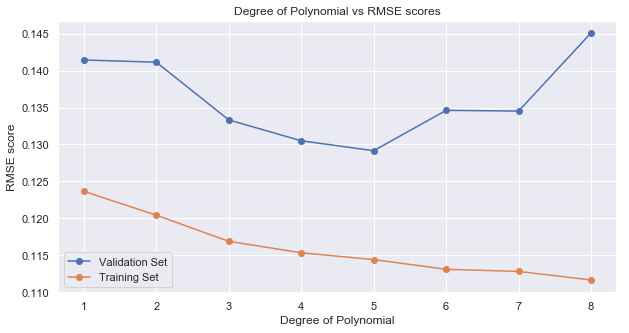

In [21]:
val_dict = {}
train_dict = {}

for i in range(2,10):
    x_train_imp = polynomial(x_train_norm, important_cols, i)
    x_val_imp = polynomial(x_val_norm, important_cols, i)
    model = LinearRegression().fit(x_train_imp, y_train.values.ravel())
    train_dict[i-1] = rmse(y_train, model.predict(x_train_imp))
    val_dict[i-1] = rmse(y_val, model.predict(x_val_imp))
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(val_dict.keys(), val_dict.values(), 'o-', label='Validation Set')
ax.plot(train_dict.keys(), train_dict.values(), 'o-', label='Training Set')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('RMSE score')
ax.set_title('Degree of Polynomial vs RMSE scores')
ax.legend()

In [22]:
deg = 5
x_train_imp = polynomial(x_train_norm, important_cols, deg)
x_val_imp = polynomial(x_val_norm, important_cols, deg)
imp_model = LinearRegression().fit(x_train_imp, y_train.values.ravel())
print(rmse(y_train, imp_model.predict(x_train_imp)))
print(rmse(y_val, imp_model.predict(x_val_imp)))

0.1152984354415454
0.1304882835853319


### Chosen Model: Polynomial Model with degree 5 on 8 correlated variables

### Generating Test Set Predictions

In [23]:
chosen_model = imp_model

In [24]:
test_df = pd.read_csv('data/test.csv')
missing_cols = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley']
test_df = test_df.drop(missing_cols, axis=1)
test_df.columns.values.shape

(75,)

In [25]:
test_df = test_df.select_dtypes(include=numerics)
test_df = test_df.fillna(test_df.median())
x_test_norm = standardize(test_df, x_train)
x_test_imp = polynomial(x_test_norm, important_cols, deg)
preds_test = chosen_model.predict(x_test_imp)
preds_test.mean(), preds_test.std()

(12.09226211804262, 0.3751601236050909)

In [26]:
test_df['SalePrice'] = np.exp(preds_test)
test_df_submit = test_df[['Id', 'SalePrice']]
test_df_submit.to_csv('data/submission.csv', index=False)

### Score: 0.25988